In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler



In [3]:
df=pd.read_csv("/content/Employee.csv")
df.head(6)


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
5,Infosys,NaN,5000.0,Calcutta,India,0


In [4]:
# Data Exploration: Explore the data, list down the unique values in each feature and find its length.
#Perform the statistical analysis and renaming of the columns


unique_values={col: df[col].unique().tolist() for col in df.columns}
print(" * Unique values in each column:")
for col,values in unique_values.items():
    print(f"{col}:{values}\n")

column_len=df.count()
print("\n * Non-Null Value Count for Each Column:")
print(column_len)

stat_summary =df.describe(include='all')
print("\n * Statistical Summary:")
print(stat_summary)

df.rename(columns=lambda x: x.strip().lower().replace(" ","_"),inplace=True)
print("\n * Column name after renaming\n",df.columns.tolist())


 * Unique values in each column:
Company:['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services', 'Congnizant', 'Infosys Pvt Lmt']

Age:[20.0, 30.0, 35.0, 40.0, 23.0, nan, 34.0, 45.0, 18.0, 22.0, 32.0, 37.0, 50.0, 21.0, 46.0, 36.0, 26.0, 41.0, 24.0, 25.0, 43.0, 19.0, 38.0, 51.0, 31.0, 44.0, 33.0, 17.0, 0.0, 54.0]

Salary:[nan, 2300.0, 3000.0, 4000.0, 5000.0, 6000.0, 7000.0, 8000.0, 9000.0, 1089.0, 1234.0, 3030.0, 3045.0, 3184.0, 4824.0, 5835.0, 7084.0, 8943.0, 8345.0, 9284.0, 9876.0, 2034.0, 7654.0, 2934.0, 4034.0, 5034.0, 8202.0, 9024.0, 4345.0, 6544.0, 6543.0, 3234.0, 4324.0, 5435.0, 5555.0, 8787.0, 3454.0, 5654.0, 5009.0, 5098.0, 3033.0]

Place:['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin', nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune']

Country:['India']

Gender:[0, 1]


 * Non-Null Value Count for Each Column:
Company    140
Age        130
Salary     124
Place      134
Country    148
Gender     148
dtype: int64

 * Statistical Summary:
       Company

In [5]:
# Data Cleaning:  Find the missing and inappropriate values, treat them appropriately.
# Remove all duplicate rows. Find the outliers. Replace the value 0 in age as NaN
# Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

df_clean=df.copy()
df_clean=df_clean.drop_duplicates()
print(f"\n Removed {len(df) - len(df_clean)} duplicate rows")


# Standardize company names
df_clean['company'] = df_clean['company'].replace({
    'Tata Consultancy Services': 'TCS',
    'Infosys Pvt Lmt': 'Infosys',
    'Congnizant': 'CTS'
})

df_clean['age']=df['age'].replace(0,np.nan)

df_clean['age']=df_clean['age'].fillna(df_clean['age'].median())

df_clean['salary']=df_clean['salary'].fillna(df_clean['salary'].median())

df_clean['place']=df_clean['place'].fillna(df_clean['place'].mode)

df_clean=df_clean.dropna(subset=['company'])



 Removed 4 duplicate rows


In [6]:
# Handle outliers in Age and Salary
# Calculate IQR for salary
Q1 = df_clean['salary'].quantile(0.25)
Q3 = df_clean['salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df_clean['salary'] = np.where(df_clean['salary'] < lower_bound, lower_bound,
                              np.where(df_clean['salary'] > upper_bound, upper_bound, df_clean['salary']))

# Verify cleaning
print("\nMissing values after cleaning:")
print(df_clean.isnull().sum())



Missing values after cleaning:
company    0
age        0
salary     0
place      0
country    0
gender     0
dtype: int64



Filtered data (Age > 40 and Salary < 5000):
     company   age  salary      place country  gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


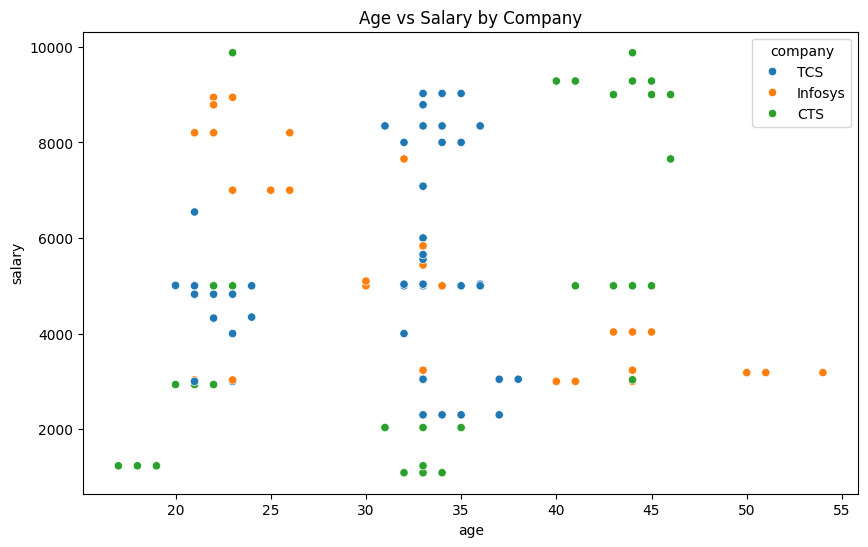

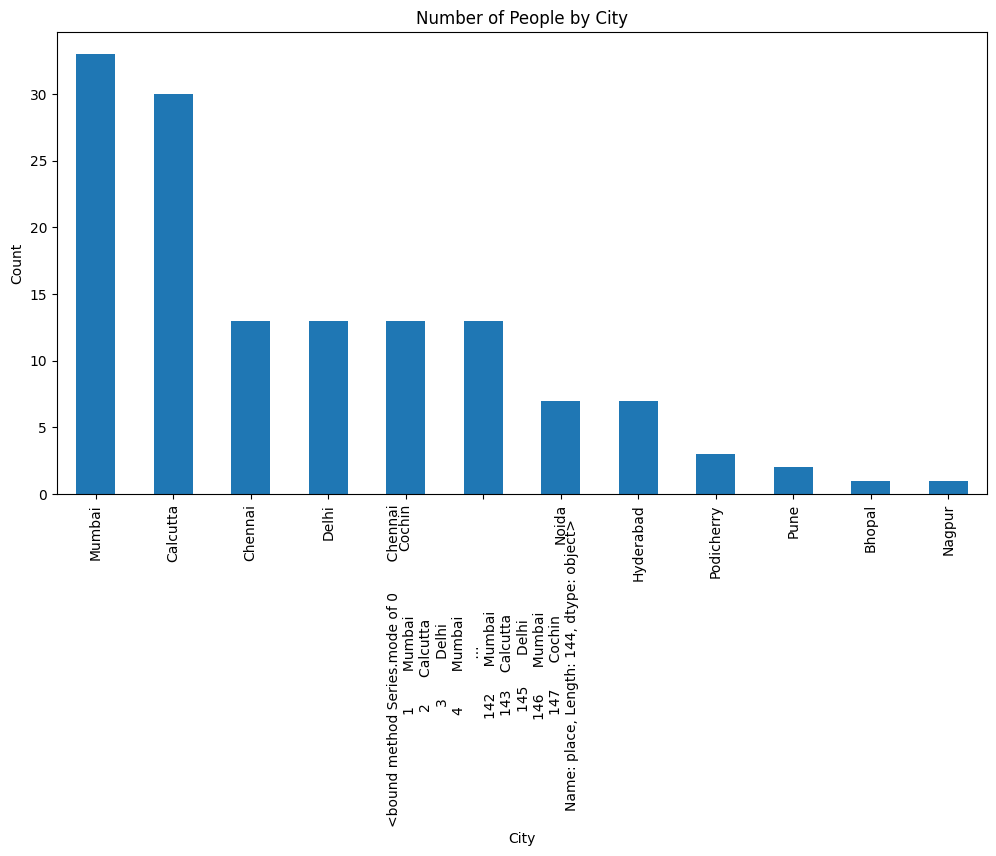

In [7]:
# Data Analysis: (Score : 2) Filter the data with age >40 and salary<5000
# Plot the chart with age and salary Count the number of people from each place and represent it visually Data

filtered_data = df_clean[(df_clean['age'] > 40) & (df_clean['salary'] < 5000)]
print("\nFiltered data (Age > 40 and Salary < 5000):")
print(filtered_data)


# Plot age vs salary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='age', y='salary', hue='company')
plt.title('Age vs Salary by Company')
plt.show()

# Count people by city and visualize
city_counts = df_clean['place'].value_counts()
plt.figure(figsize=(12, 6))
city_counts.plot(kind='bar')
plt.title('Number of People by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [8]:
# Encoding: Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding,
# making them suitable for analysis by machine learning algorithms.

# For Company (nominal categorical) - one-hot encoding
company_encoded = pd.get_dummies(df_clean['company'], prefix='company')

# For place (nominal categorical) - one-hot encoding
city_encoded = pd.get_dummies(df_clean['place'], prefix='place')

# For Country (only one value 'India') - we can drop this column
# For gender (already binary) - no encoding needed

# Combine encoded data with original numerical columns
df_encoded = pd.concat([
    df_clean[['age', 'salary', 'gender']],
    company_encoded,
    city_encoded
], axis=1)

print("\nEncoded DataFrame:")
print(df_encoded.head(3))



Encoded DataFrame:
    age  salary  gender  company_CTS  company_Infosys  company_TCS  \
0  20.0  5000.0       0        False            False         True   
1  30.0  5000.0       0        False             True        False   
2  35.0  2300.0       0        False            False         True   

   place_<bound method Series.mode of 0       Chennai\n1        Mumbai\n2      Calcutta\n3         Delhi\n4        Mumbai\n         ...   \n142      Mumbai\n143    Calcutta\n145       Delhi\n146      Mumbai\n147      Cochin\nName: place, Length: 144, dtype: object>  \
0                                              False                                                                                                                                                                                                                        
1                                              False                                                                                                             

In [9]:
#  Feature Scaling: After the process of encoding,
# perform the scaling of the features using standardscaler and minmaxscaler.

numerical_features = df_encoded[['age', 'salary']]

# Standard Scaling
scaler_standard = StandardScaler()
standard_scaled = scaler_standard.fit_transform(numerical_features)
df_standard = pd.DataFrame(standard_scaled, columns=['Age_Standard', 'Salary_Standard'])

# MinMax Scaling
scaler_minmax = MinMaxScaler()
minmax_scaled = scaler_minmax.fit_transform(numerical_features)
df_minmax = pd.DataFrame(minmax_scaled, columns=['Age_MinMax', 'Salary_MinMax'])

# Combine scaled features with the rest
df_final = pd.concat([
    df_standard,
    df_minmax,
    df_encoded.drop(['age', 'salary'], axis=1)
], axis=1)

print("\nFinal DataFrame with scaled features:")
print(df_final.head())



Final DataFrame with scaled features:
   Age_Standard  Salary_Standard  Age_MinMax  Salary_MinMax  gender  \
0     -1.489216        -0.088042    0.081081       0.445089     0.0   
1     -0.287950        -0.088042    0.351351       0.445089     0.0   
2      0.312682        -1.225705    0.486486       0.137817     0.0   
3      0.913315        -0.930755    0.621622       0.217480     0.0   
4     -1.128836        -0.509398    0.162162       0.331285     0.0   

  company_CTS company_Infosys company_TCS  \
0       False           False        True   
1       False            True       False   
2       False           False        True   
3       False            True       False   
4       False           False        True   

  place_<bound method Series.mode of 0       Chennai\n1        Mumbai\n2      Calcutta\n3         Delhi\n4        Mumbai\n         ...   \n142      Mumbai\n143    Calcutta\n145       Delhi\n146      Mumbai\n147      Cochin\nName: place, Length: 144, dtype: object